In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Data Covid19.csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236017 entries, 0 to 236016
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  173972 non-null  object
 1   Country/Region  236017 non-null  object
 2   Last Update     236017 non-null  object
 3   Confirmed       236017 non-null  int64 
 4   Deaths          236017 non-null  int64 
 5   Recovered       236017 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 10.8+ MB


In [4]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/20 17:00', '1/24/20 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [5]:
latest_date = '28/02/2021 05.22'
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
235253,NaN,Afghanistan,28/02/2021 05.22,55707,2443,49288
235254,NaN,Albania,28/02/2021 05.22,106215,1775,68969
235255,NaN,Algeria,28/02/2021 05.22,112960,2979,77976
235256,NaN,Andorra,28/02/2021 05.22,10849,110,10429
235257,NaN,Angola,28/02/2021 05.22,20782,506,19315
...,...,...,...,...,...,...
236012,Zaporizhia Oblast,Ukraine,28/02/2021 05.22,69504,1132,65049
236013,Zeeland,Netherlands,28/02/2021 05.22,16480,178,0
236014,Zhejiang,Mainland China,28/02/2021 05.22,1321,1,1314
236015,Zhytomyr Oblast,Ukraine,28/02/2021 05.22,50582,834,44309


In [6]:
unique_countries = data[data.Confirmed>0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array([' Azerbaijan', "('St. Martin',)", 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Denmark', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'F

In [7]:
country_confirmed_case = []
for i in unique_countries:
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-7-1d4d890109d8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed>0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())


In [8]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Kazakhstan', 262093), ('Brunei', 186), ('Barbados', 3038), ('Martinique', 0), ('Norway', 70826), ('Samoa', 3), ('Armenia', 171793), ('Malaysia', 298315), ('Greece', 189831), ('Lesotho', 10491), ('Mexico', 2084128), ('Vanuatu', 1), ('Malta', 22219), ('Romania', 799164), ('Cameroon', 35714), ('Jamaica', 22817), ('Niger', 4740), ('France', 3747263), ('Cabo Verde', 15324), ('Guatemala', 174335), ('Gambia', 4691), ("('St. Martin',)", 0), ('Iran', 1623159), ('Brazil', 10517232), (' Azerbaijan', 0), ('Croatia', 242617), ('French Guiana', 0), ('Equatorial Guinea', 6005), ('Gibraltar', 0), ('Qatar', 163197), ('Latvia', 85810), ('Faroe Islands', 0), ('Israel', 773335), ('North Macedonia', 102482), ('Rwanda', 18790), ('Singapore', 59925), ('Dominica', 142), ('South Sudan', 7771), ('Bosnia and Herzegovina', 130979), ('Andorra', 10849), ('New Zealand', 2376), ('Nicaragua', 6445), ('Channel Islands', 0), ('Saint Lucia', 3356), ('Azerbaijan', 234267), ('Czech Republic', 1227595), ('Nigeria', 15541

In [9]:
unique_provinces = data['Province/State'][data.Confirmed>1].unique()
unique_provinces

array(['Beijing', 'Chongqing', 'Guangdong', 'Guangxi', 'Hainan', 'Henan',
       'Hubei', 'Hunan', 'Jiangxi', 'Liaoning', 'Shandong', 'Shanghai',
       'Sichuan', 'Tianjin', 'Zhejiang', nan, 'Anhui', 'Fujian', 'Gansu',
       'Guizhou', 'Heilongjiang', 'Hong Kong', 'Jiangsu', 'Macau',
       'Shaanxi', 'Xinjiang', 'Yunnan', 'Jilin', 'Taiwan', 'Ningxia',
       'Hebei', 'Inner Mongolia', 'Shanxi', 'California', 'Qinghai',
       'New South Wales', 'Bavaria', 'Ontario', 'Victoria', 'Queensland',
       'Illinois', 'Chicago, IL', 'South Australia', 'San Benito, CA',
       'Santa Clara, CA', 'Toronto, ON', 'British Columbia',
       'Cruise Ship', 'Diamond Princess cruise ship',
       'San Diego County, CA', 'Ashland, NE', 'Travis, CA',
       'From Diamond Princess', 'Lackland, TX',
       'Omaha, NE (From Diamond Princess)',
       'Travis, CA (From Diamond Princess)',
       'Lackland, TX (From Diamond Princess)',
       'Unassigned Location (From Diamond Princess)', 'None',
       '

In [10]:
province_confirmed_case = []
for i in unique_provinces:
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())

<ipython-input-10-d611d3719f0b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed>0][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())


In [11]:
print(set(zip(unique_provinces, province_confirmed_case)))

{('Sormland', 13207), ('Montgomery County, PA', 0), ('Virginia', 574314), ('King County, WA', 0), ('Mykolaiv Oblast', 42053), ('Baleares', 55991), ('Himachal Pradesh', 58598), ('Amapa', 83505), ('Floyd County, GA', 0), ('Tolima', 65123), ('Chongqing', 591), ('Drenthe', 21678), ('Montgomery County, MD', 0), ('Niedersachsen', 164439), ('Durango', 30886), ('Kherson Oblast', 21673), ('Tatarstan Republic', 17923), ('Ashland, NE', 0), ('Morelos', 26206), ('Vermont', 15098), ('Nagano', 2364), ('Khyber Pakhtunkhwa', 72162), ('Harrison County, KY', 0), ('Guainia', 1304), ('Flevoland', 25719), ('Tochigi', 4098), ('Australian Capital Territory', 118), ('Saint Pierre and Miquelon', 24), ('Chernihiv Oblast', 35829), ('Distrito Federal', 295615), ('Sergipe', 150533), ('Astrakhan Oblast', 28181), ('Friuli Venezia Giulia', 76471), ('Kochi', 884), ('Volgograd Oblast', 49191), ('Gifu', 4613), ('Magdalena', 33392), ('Greenland', 30), ('Washington', 339773), ('Ancash', 42507), ('Gunma', 4492), ('Ishikawa'

In [12]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [13]:
unique_provinces = list(unique_provinces)
province_confirmed_case = list(province_confirmed_case)

In [14]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_case.pop(i)

unique_provinces

['Beijing',
 'Chongqing',
 'Guangdong',
 'Guangxi',
 'Hainan',
 'Henan',
 'Hubei',
 'Hunan',
 'Jiangxi',
 'Liaoning',
 'Shandong',
 'Shanghai',
 'Sichuan',
 'Tianjin',
 'Zhejiang',
 'Anhui',
 'Fujian',
 'Gansu',
 'Guizhou',
 'Heilongjiang',
 'Hong Kong',
 'Jiangsu',
 'Macau',
 'Shaanxi',
 'Xinjiang',
 'Yunnan',
 'Jilin',
 'Taiwan',
 'Ningxia',
 'Hebei',
 'Inner Mongolia',
 'Shanxi',
 'California',
 'Qinghai',
 'New South Wales',
 'Bavaria',
 'Ontario',
 'Victoria',
 'Queensland',
 'Illinois',
 'Chicago, IL',
 'South Australia',
 'San Benito, CA',
 'Santa Clara, CA',
 'Toronto, ON',
 'British Columbia',
 'Cruise Ship',
 'Diamond Princess cruise ship',
 'San Diego County, CA',
 'Ashland, NE',
 'Travis, CA',
 'From Diamond Princess',
 'Lackland, TX',
 'Omaha, NE (From Diamond Princess)',
 'Travis, CA (From Diamond Princess)',
 'Lackland, TX (From Diamond Princess)',
 'Unassigned Location (From Diamond Princess)',
 'None',
 'Sacramento County, CA',
 'Seattle, WA',
 'Western Australia',
 'S

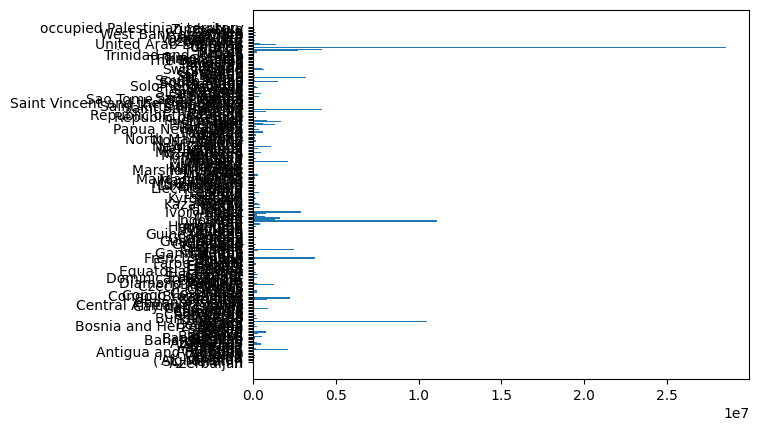

In [15]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

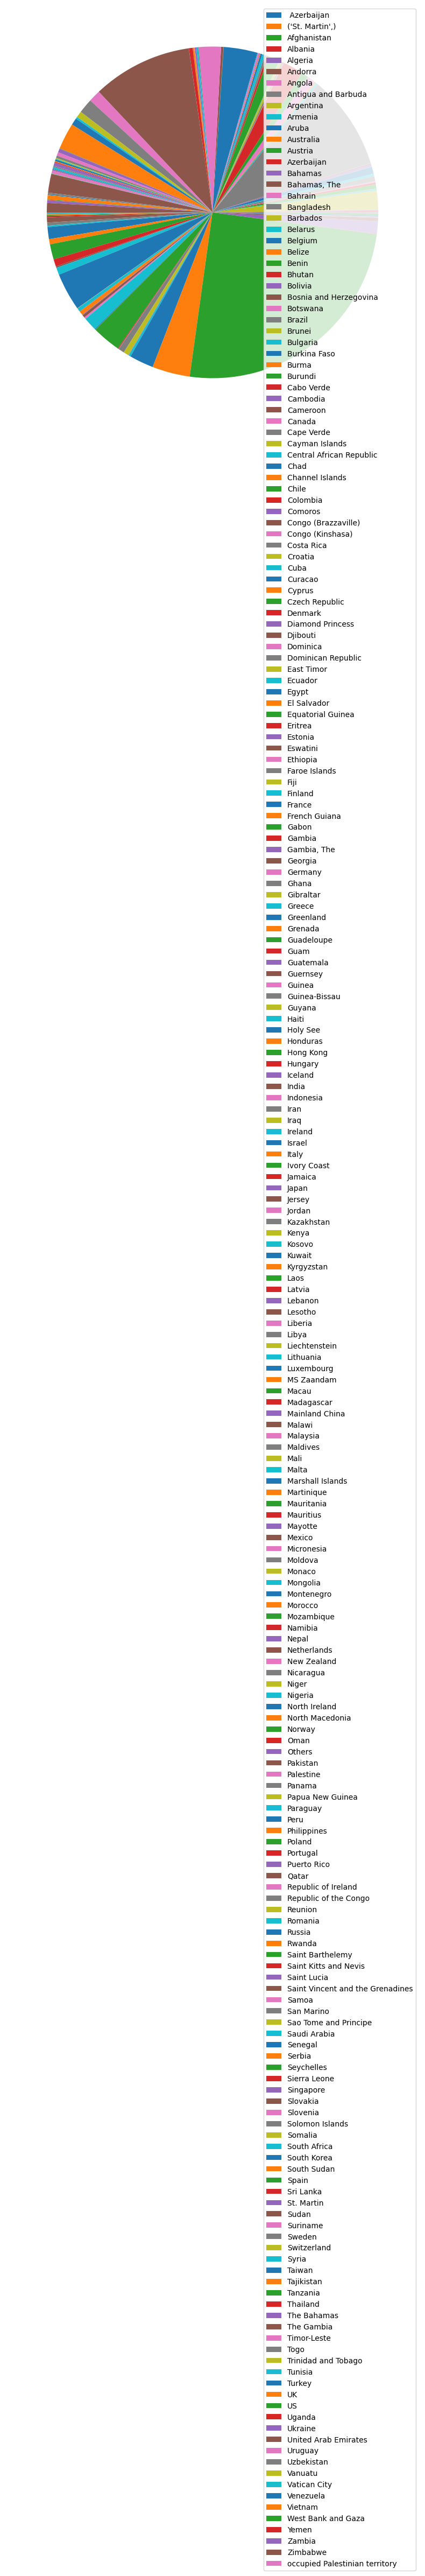

In [16]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()